# Using SymPy for Plotting Geometry

When I'm not learning math formally as [World's Oldest Math Major](/worlds-oldest-math-major/), sometimes I just read about the subject for fun, without any university credit accruing to it. Case in point:  I recently picked up a free public domain copy of Euclid's elements and started working through it.

Most people know that Euclid's elements is about geometry, and it represents a sort of proof-based, pure math approach to the subject that begins with a simple set of axioms and then develops proofs of more complex theorems along the way.

What I didn't know before picking up the book was that Euclid also worked through many "Propositions".  Like the proofs, propositions start with known axioms and definitions.  Unlike a proof, however, the goal of a proposition is often to do something more or less "practical" (to a student of geometry at least).

For example, the very first Proposition in Book I of the elements walks the reader through creating an equilateral triangle, by drawing two circles centered at the points of a horizontal line segments, with the radius of the circle equal to the length of the line segment.  Once this is done, the intersection of the two circles forms the third vertex.  Moreover, because both circles have the same radius as the line AB, then the sides AC and BC are both the same length as AB.

Here we show a recreation of the drawing that appears in the Elements, with a rather anachronistic set of X,Y coordinates:

![/images/EuclidProposition1.png](/images/EuclidProposition1.png)

When I first read through this proposition, I was a Euclid fan from that point on since it seemed such an intuitive and cool result.

## Enter SymPy

In [1]:
from sympy import init_session, sqrt, symbols
from sympy.geometry import Triangle, Circle, Point
from sympy.plotting.plot_implicit import plot_implicit
import numpy as np
import matplotlib.pyplot as plt

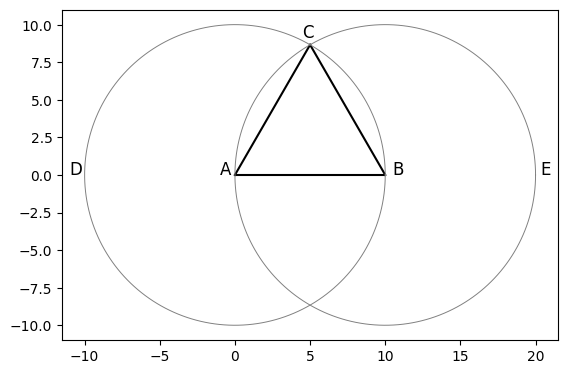

In [2]:
%matplotlib inline

def make_plottable(p1, p2):
    # converts ("flattens") two points to two arrays with x-value, y-value
    return [p1.x, p2.x],[p1.y, p2.y]

# Set up our main points and draw our triangle according to 
vertices = [Point(0,0), Point(10, 0), Point(5, 5 * sqrt(3))]
t = Triangle(*vertices)

f, axes = plt.subplots(1)
axes.set_aspect(1)

for side in t.sides:    
    x, y = make_plottable(*side.points)
    axes.plot(x,y, color='black')


# Now according to Euclid

# the radius of the two circles == line AB
r = 10

# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 200)

# Left circle
# compute x1 and x2
x = r*np.cos(theta)
y = r*np.sin(theta)
axes.plot(x, y, color="gray", linewidth=".7")

# Right circle
x = r*np.cos(theta) + 10
y = r*np.sin(theta)
axes.plot(x, y, color="gray", linewidth=".7")

# Label vertices
axes.text(-1, 0, "A", fontsize='large')
axes.text(10.5, 0, "B", fontsize='large')
axes.text(4.5, 5 * sqrt(3) + .5, "C", fontsize='large')

# Label circles
axes.text(-11, 0, "D", fontsize='large')
_ = axes.text(20.3, 0, "E", fontsize='large')

          

See this page:  
https://www.cfm.brown.edu/people/dobrush/am33/SymPy/part1.html#plotting-geometric-entities

In [3]:
c1 = Circle(vertices[0], r)
c2 = Circle(vertices[1], r)
intersection = c1.intersect(c2)
print(vertices[2] in list(intersection))
print(vertices[2], intersection)

# Are three sides the same?

print([side.length for side in t.sides])

True
Point2D(5, 5*sqrt(3)) {Point2D(5, -5*sqrt(3)), Point2D(5, 5*sqrt(3))}
[10, 10, 10]
